In [1]:
# Import useful libraries
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


###### IDEA:
There is a problem with the way citbike data is collected.

Although the subscribers are inputting their gender data properly, customers are not doing the same.

Thus, any analysis based on gender can become skewed.

Clear Idea: Customers are not inputting the gender data properly

###### NULL HYPOTHESIS:
The proportion of customers with unknown gender is the same or higher than the proportion of subscribers with unknown gender

_$H_0$ : $\frac{C_{\mathrm{ unknown-gender}}}{C_{\mathrm{ total}}} >= \frac{S_{\mathrm{ unknown-gender}}}{S_{\mathrm{ total}}}$

_$H_1$ : $\frac{C_{\mathrm{ unknown-gender}}}{C_{\mathrm{ total}}} < \frac{S_{\mathrm{ unknown-gender}}}{S_{\mathrm{ total}}}$

or identically:

_$H_0$ : $\frac{C_{\mathrm{unknown-gender}}}{C_{\mathrm{total}}} - \frac{S_{\mathrm{unknown-gender}}}{S_{\mathrm{total}}} >= 0 $

_$H_1$ : $\frac{C_{\mathrm{unknown-gender}}}{C_{\mathrm{total}}} - \frac{S_{\mathrm{unknown-gender}}}{S_{\mathrm{total}}} < 0$

I will use a significance level  $\alpha=0.05$

In [2]:
# Define a function to obtain citibike data

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.csv.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")
        ### Download the file
        print ("Downloading the file")

    else:
        print ("file in place, you can continue")

In [3]:
# Check if PUIDATA is present or not
print("PUIdata", os.getenv("PUIDATA"))

# Create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/skp454/PUIdata
PUIdata /nfshome/skp454/PUIdata


In [4]:
# Download the required data
datestring = '201808'
getCitiBikeCSV(datestring)

file in place, you can continue


In [6]:
# Read csv into df_citiBike datfarame 
df_citiBike=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

# display top rows of the complete data frame    
df_citiBike.head()   

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


In [9]:
# Drop the unwanted columns
df_citiBikeTruncated = df_citiBike.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year'], axis=1)

In [10]:
# Display top rows of the truncated dataframe
df_citiBikeTruncated.head()

,usertype,gender
0,Subscriber,1
1,Subscriber,1
2,Subscriber,1
3,Subscriber,1
4,Subscriber,1


Text(0,0.5,'Number of Riders')

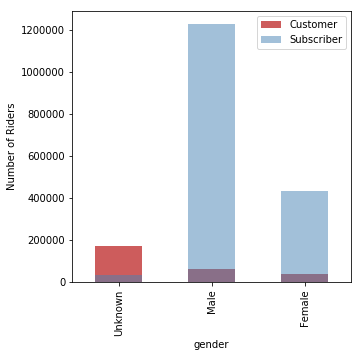

In [11]:
# Plot the count of Customer and Subscribers of different gender Type

fig = pl.figure(figsize(5,5))

# Instead of plotting with matplotlib i.e. plot() i use the plot method in pandas
(df_citiBikeTruncated['gender'][df_citiBikeTruncated['usertype'] == "Customer"].groupby(df_citiBikeTruncated['gender']).count()).plot(kind="bar", 
                                                                                              color='IndianRed',
                                                                                              label='Customer')

ax = (df_citiBikeTruncated['gender'][df_citiBikeTruncated['usertype'] == "Subscriber"].groupby(df_citiBikeTruncated['gender']).count()).plot(kind="bar", 
                                                                                         color='SteelBlue',
                                                                                         alpha=0.5,
                                                                                         label='Subscriber')


tmp = ax.xaxis.set_ticklabels(['Unknown', 'Male', 'Female'], fontsize=10)
pl.legend()
pl.ylabel("Number of Riders")

#### Figure 1a: Distribution of customers and subscribers for different gender type (Absolute Counts)
Note: the counts have errors of course. what is the error on the count statistics?

for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic


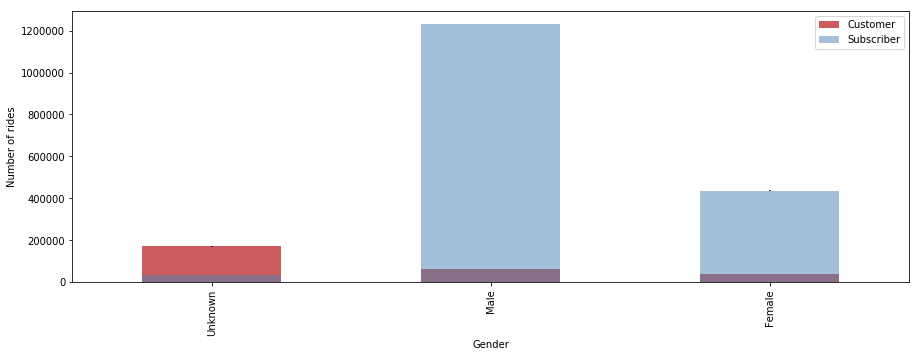

In [12]:
fig=pl.figure(figsize(15,5))

counts_c = df_citiBikeTruncated.gender[df_citiBikeTruncated.usertype == "Customer"].groupby([df_citiBikeTruncated.gender]).count()
norm_c = 1
error_c=np.sqrt(counts_c)
ax= ((counts_c) / norm_c).plot(kind="bar", yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           color='IndianRed', label='Customer')

counts_s = df_citiBikeTruncated.gender[df_citiBikeTruncated.usertype == "Subscriber"].groupby([df_citiBikeTruncated.gender]).count()
norm_s = 1
error_s = np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5 ,color='SteelBlue',  yerr=[
            ((error_s) / norm_s, (error_s) / norm_s)], label='Subscriber')



ax.xaxis.set_ticklabels(['Unknown', 'Male', 'Female'], fontsize=10)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Gender")
pl.legend(['Customer','Subscriber'],fontsize=10)

#### Figure 1b: Distribution of customers and subscribers for different gender type (Absolute Counts with Statistical Errors)
Due to large difference between the number of rides for customers and subscribers it is difficult to make any comparison.
Thus, we will divide by the total to create ratios/proportions for easy comparison

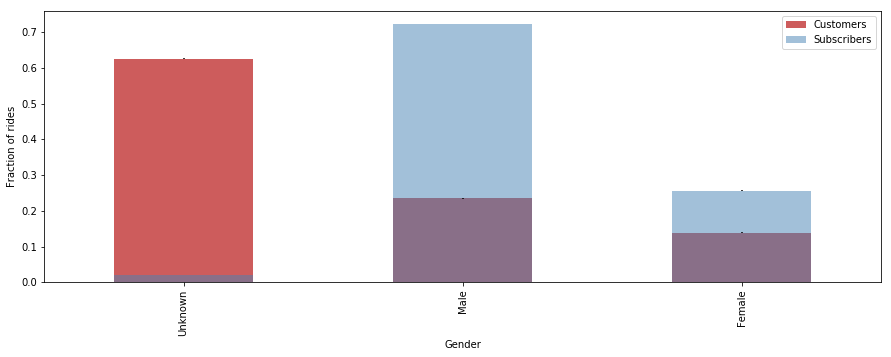

In [13]:
fig = pl.figure(figsize(15,5))

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='Customers')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='Subscribers')

ax.xaxis.set_ticklabels(['Unknown','Male','Female'], fontsize=10)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Gender")

pl.legend(['Customers','Subscribers'],fontsize=10)

#### 2: Distribution of customers and subscribers by gender type normalized

The skew is unknown gender type for customers is clearly visible from this graph. 